<a href="https://colab.research.google.com/github/eceirem/Artificial-Neural-Networks/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the libraries

In [114]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the MNIST dataset in Keras

In [ ]:
from keras.datasets import mnist
from keras import models
from keras import layers

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_images)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Displaying the Fourth Digit

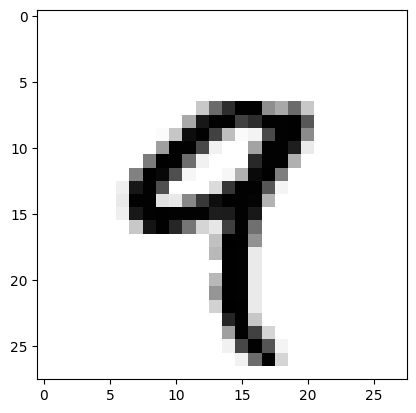

In [ ]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
digit_label = train_labels[4]
print(digit_label)

9


The Network Architecture

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The Compilation Step

In [ ]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Preparing the Image Data

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255

In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Preparing the Labels

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Training the Model

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8732 - loss: 0.4334
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9655 - loss: 0.1176
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9794 - loss: 0.0701
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9848 - loss: 0.0506
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9890 - loss: 0.0367


Test the Model

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9761 - loss: 0.0759
test_acc: 0.9803000092506409
